In [ ]:
import pandas as pd

df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


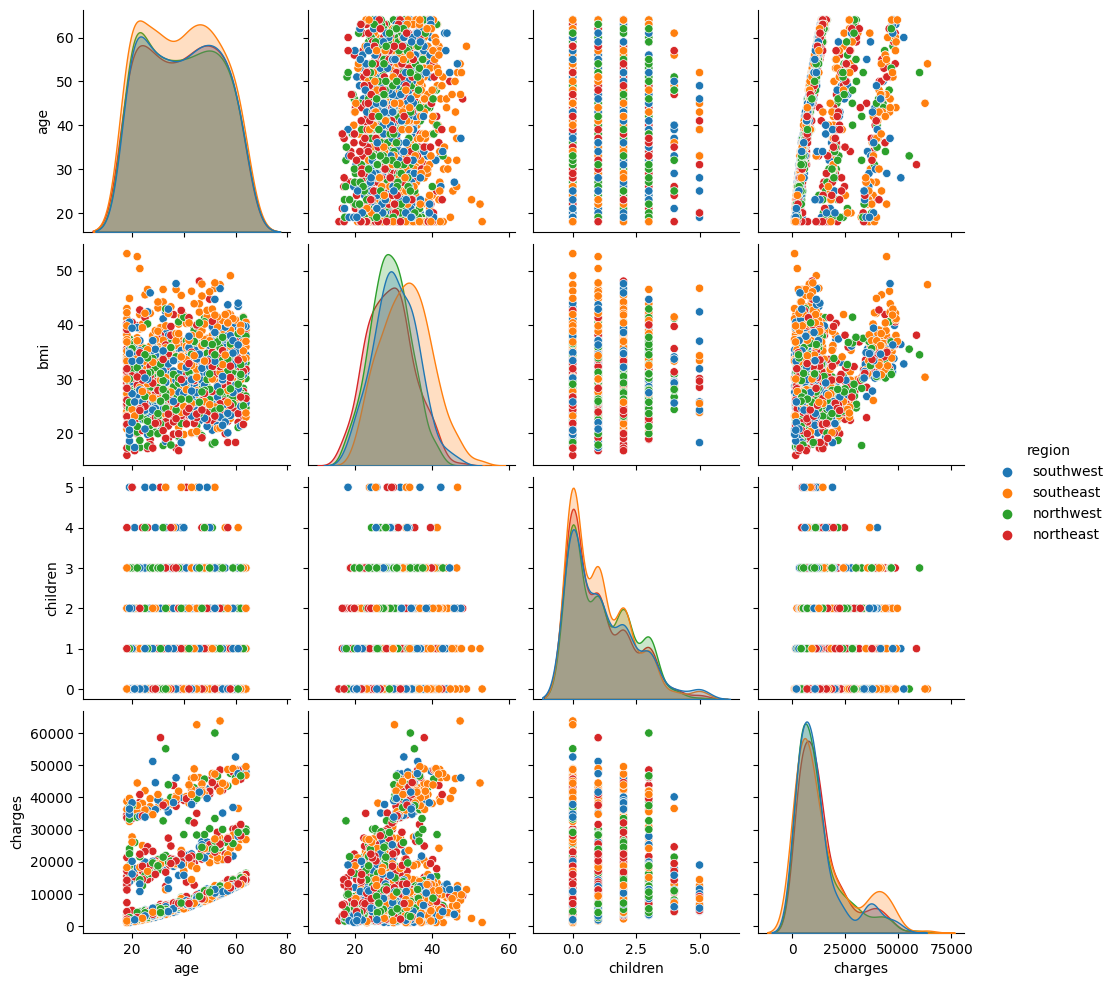

In [ ]:
import seaborn as sns
sns.pairplot(df,hue='region')

In [ ]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

#encoded_data = df(columns=['sex','smoker','region'])
df[['sex','smoker','region']]= df[['sex','smoker','region']].apply(LabelEncoder().fit_transform)


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [ ]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

<Axes: >

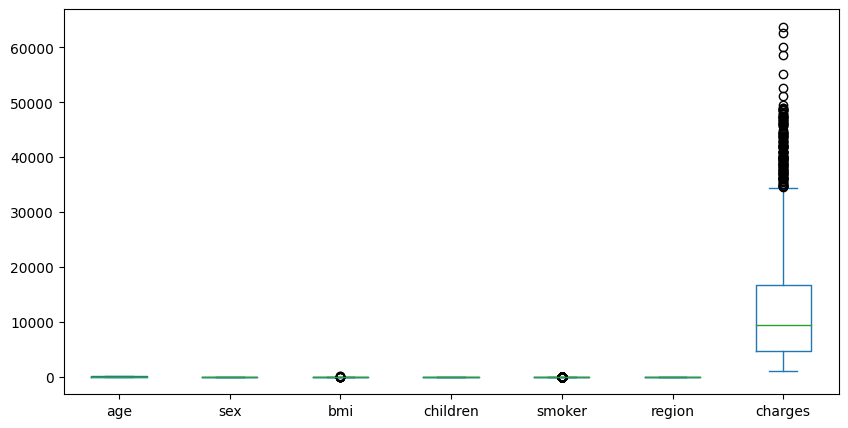

In [ ]:
df.plot(kind='box', layout=(1,1), figsize=(10,5))

reg = RandomForestRegressor
reg.fit(x_train, y_train)

y_pred = reg.predict(new_person)
accuracy_score(y_test, y_pred)

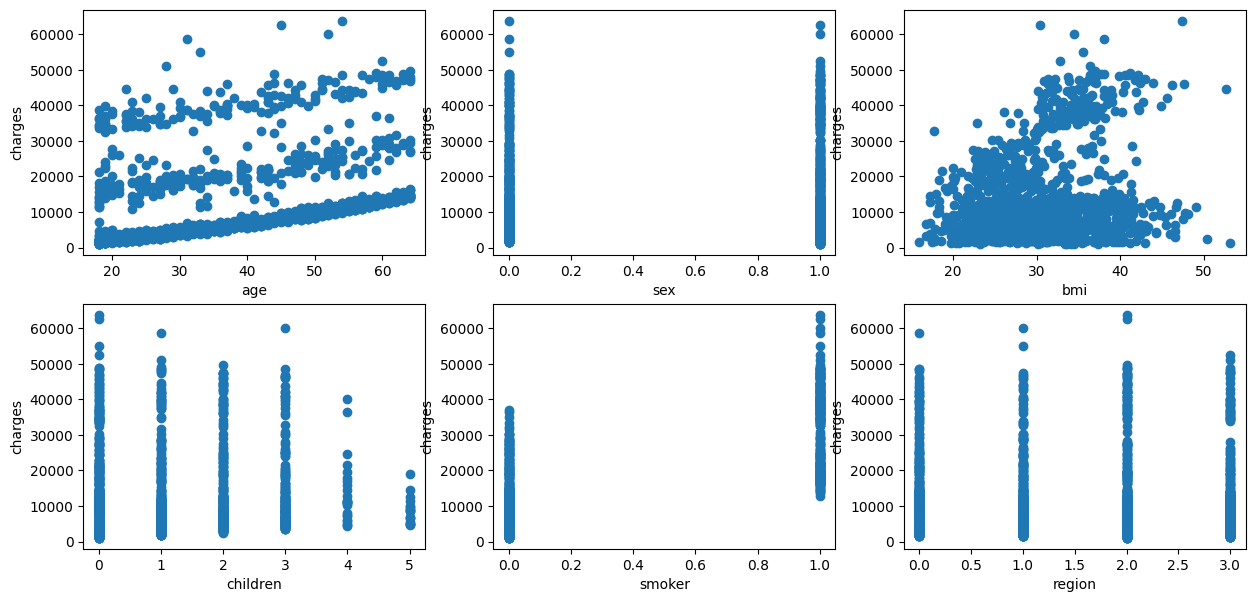

In [ ]:
import matplotlib.pyplot as plt

x_columns = df.columns[:-1].tolist()
y_column = df.columns[-1]
plt.figure(figsize=(15,7))
for i in range(len(x_columns)):
    plt.subplot(2,3,i+1)
    plt.scatter(df[x_columns[i]], df[y_column])
    plt.xlabel(x_columns[i])
    plt.ylabel(y_column)
plt.show()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=7)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

reg1 = LinearRegression()
reg1.fit(x_train,y_train)

y_pred = reg1.predict(x_test)
print("\t\t Linear Regression")
print("R2 score :", r2_score(y_test,y_pred))
print("Mean absolute error :", mean_absolute_error(y_test,y_pred))
print("Mean squared error :", mean_squared_error(y_test,y_pred))
print("Root Mean squared error :", mean_squared_error(y_test,y_pred, squared=False))

		 Linear Regression
R2 score : 0.7644939656224733
Mean absolute error : 4284.701239383256
Mean squared error : 37677145.53247383
Root Mean squared error : 6138.1711879413915


In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg2 = DecisionTreeRegressor()
reg2.fit(x_train,y_train)

y_pred = reg2.predict(x_test)
print("\t\t Decision Tree Regressor")
print("R2 score :", r2_score(y_test,y_pred))
print("Mean absolute error :", mean_absolute_error(y_test,y_pred))
print("Mean squared error :", mean_squared_error(y_test,y_pred))
print("Root Mean squared error :", mean_squared_error(y_test,y_pred, squared=False))

		 Decision Tree Regressor
R2 score : 0.6813663609259891
Mean absolute error : 3449.6303509888057
Mean squared error : 50976213.932966016
Root Mean squared error : 7139.762876522302


In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg3 = RandomForestRegressor()
reg3.fit(x_train,y_train)

y_pred = reg3.predict(x_test)
print("\t\t Random Forest Regressor")
print("R2 score :", r2_score(y_test,y_pred))
print("Mean absolute error :", mean_absolute_error(y_test,y_pred))
print("Mean squared error :", mean_squared_error(y_test,y_pred))
print("Root Mean squared error :", mean_squared_error(y_test,y_pred, squared=False))

		 Random Forest Regressor
R2 score : 0.8385369715547035
Mean absolute error : 2857.7670969203723
Mean squared error : 25831465.579753805
Root Mean squared error : 5082.466485846592


In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
error = []
# Calculating MAE error for K values between 1 and 20
for i in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

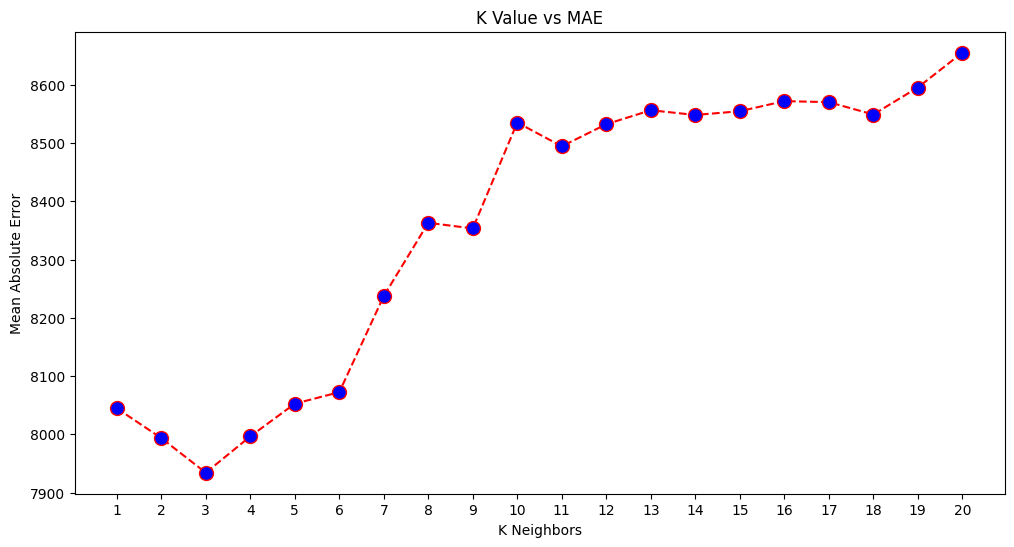

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xticks(range(1, 21))
plt.title('K Value vs MAE')
plt.xlabel('K Neighbors')
plt.ylabel('Mean Absolute Error')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

reg4 = KNeighborsRegressor(n_neighbors=3)
reg4.fit(x_train,y_train)

y_pred = reg4.predict(x_test)
print("\t\t K Nearest Neighbors Regressor")
print("R2 score :", r2_score(y_test,y_pred))
print("Mean absolute error :", mean_absolute_error(y_test,y_pred))
print("Mean squared error :", mean_squared_error(y_test,y_pred))
print("Root Mean squared error :", mean_squared_error(y_test,y_pred, squared=False))

		 K Nearest Neighbors Regressor
R2 score : 0.16509507398300616
Mean absolute error : 7934.090490745024
Mean squared error : 133571245.79192255
Root Mean squared error : 11557.302704001593


In [ ]:
new_person = {
    'age':[25,26,30], 'sex':[1,1,0], 'bmi':[26,21,25] , 'children':[1,0,3], 'smoker':[1,0,0], 'region': [1,2,3]
}
new_person_df = pd.DataFrame(new_person)
new_person_df

,age,sex,bmi,children,smoker,region
0,25,1,26,1,1,1
1,26,1,21,0,0,2
2,30,0,25,3,0,3


In [ ]:
prediction = reg3.predict(new_person_df)
print(prediction)

[17758.7913994  2680.3720879  6925.3572285]
